In [1]:
import pandas as pd

In [2]:
db=pd.read_csv('data_breast.csv')

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
#Из пропущенных значений только 1 столбец со всеми пропущенными значениями, который можно удалить

In [5]:
db.drop('Unnamed: 32', axis=1, inplace=True)

In [6]:
#Все данные, кроме таргета, являются количественными признаками. 
#обработаем таргет, присвоим 1-M, 0-B

In [7]:
res=[]
for i in db['diagnosis'].values.tolist():
    if i=='M':
        res.append(1)
    else:
        res.append(0)
db['target']=res
db.drop('diagnosis', axis=1, inplace=True)

In [8]:
#опишем имеющиеся признаки

In [9]:
descriptions=db.describe()

In [10]:
descriptions

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
#найдем и уберем выбросы

In [12]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [13]:
res=[]
res1=[]
list_descr=descriptions.columns.tolist()[1:len(descriptions.columns.tolist())]
for i in list_descr:
    a=descriptions[i]['75%']+2*(descriptions[i]['75%']-descriptions[i]['25%'])
    res.append(a)
for i in list_descr:
    a1=descriptions[i]['25%']-2*(descriptions[i]['75%']-descriptions[i]['25%'])
    res1.append(a1)

In [14]:
for i in range(len(db.columns.tolist())-1):
    db=db[db[db.columns.tolist()[i+1]]<res[i]]

In [15]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 1 to 568
Data columns (total 32 columns):
id                         454 non-null int64
radius_mean                454 non-null float64
texture_mean               454 non-null float64
perimeter_mean             454 non-null float64
area_mean                  454 non-null float64
smoothness_mean            454 non-null float64
compactness_mean           454 non-null float64
concavity_mean             454 non-null float64
concave points_mean        454 non-null float64
symmetry_mean              454 non-null float64
fractal_dimension_mean     454 non-null float64
radius_se                  454 non-null float64
texture_se                 454 non-null float64
perimeter_se               454 non-null float64
area_se                    454 non-null float64
smoothness_se              454 non-null float64
compactness_se             454 non-null float64
concavity_se               454 non-null float64
concave points_se          454 no

In [16]:
for i in range(len(db.columns.tolist())-1):
    db=db[db[db.columns.tolist()[i+1]]>res1[i]]

In [17]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 1 to 568
Data columns (total 32 columns):
id                         454 non-null int64
radius_mean                454 non-null float64
texture_mean               454 non-null float64
perimeter_mean             454 non-null float64
area_mean                  454 non-null float64
smoothness_mean            454 non-null float64
compactness_mean           454 non-null float64
concavity_mean             454 non-null float64
concave points_mean        454 non-null float64
symmetry_mean              454 non-null float64
fractal_dimension_mean     454 non-null float64
radius_se                  454 non-null float64
texture_se                 454 non-null float64
perimeter_se               454 non-null float64
area_se                    454 non-null float64
smoothness_se              454 non-null float64
compactness_se             454 non-null float64
concavity_se               454 non-null float64
concave points_se          454 no

In [18]:
#построим корреляционную матрицу

In [19]:
corr_matrix=db.corr()

In [20]:
corr_matrix

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
id,1.000000,0.005674,0.015690,0.002200,0.013143,-0.016864,-0.059261,-0.023251,-0.004224,-0.023469,...,0.002074,0.007272,0.020480,-0.011120,-0.052288,-0.030549,-0.008974,-0.037463,-0.086256,-0.021735
radius_mean,0.005674,1.000000,0.248935,0.998084,0.992225,0.116250,0.484557,0.684069,0.787308,0.116398,...,0.252039,0.969342,0.960801,0.121769,0.432125,0.569304,0.719392,0.168074,0.038921,0.713286
texture_mean,0.015690,0.248935,1.000000,0.254892,0.255939,-0.044163,0.197487,0.272905,0.227103,0.058859,...,0.910316,0.291861,0.287392,0.067121,0.227988,0.262965,0.235178,0.097788,0.090803,0.370257
perimeter_mean,0.002200,0.998084,0.254892,1.000000,0.990215,0.153246,0.534236,0.722241,0.816118,0.144385,...,0.259162,0.975374,0.961591,0.156601,0.476065,0.606758,0.748536,0.191171,0.082113,0.729660
area_mean,0.013143,0.992225,0.255939,0.990215,1.000000,0.113327,0.470693,0.687381,0.789292,0.119250,...,0.256424,0.966357,0.973973,0.129496,0.414545,0.561268,0.707440,0.165814,0.037694,0.724264
smoothness_mean,-0.016864,0.116250,-0.044163,0.153246,0.113327,1.000000,0.669881,0.493211,0.545194,0.529499,...,0.022074,0.190282,0.162141,0.805701,0.430898,0.387576,0.479530,0.367989,0.485361,0.318115
compactness_mean,-0.059261,0.484557,0.197487,0.534236,0.470693,0.669881,1.000000,0.868160,0.819403,0.500670,...,0.219667,0.578658,0.504573,0.611549,0.873285,0.813216,0.807225,0.455260,0.686559,0.581201
concavity_mean,-0.023251,0.684069,0.272905,0.722241,0.687381,0.493211,0.868160,1.000000,0.930654,0.396458,...,0.301895,0.754493,0.709627,0.509416,0.785256,0.903922,0.870935,0.380052,0.520294,0.743463
concave points_mean,-0.004224,0.787308,0.227103,0.816118,0.789292,0.545194,0.819403,0.930654,1.000000,0.403659,...,0.261799,0.835307,0.805310,0.506388,0.681840,0.776463,0.907585,0.372038,0.397027,0.785213
symmetry_mean,-0.023469,0.116398,0.058859,0.144385,0.119250,0.529499,0.500670,0.396458,0.403659,1.000000,...,0.072532,0.177029,0.154461,0.400960,0.359531,0.308159,0.341369,0.661178,0.327988,0.285862


#мы видим, что некоторые признаки коррелируют. Есть мультиколлинеарность, надо удалить тот признак из коррелирующих признаков, который больше коррелирует с таргетом

In [21]:
res2=[]
col=corr_matrix.columns.tolist()
col.remove('target')
print(col)
for i in col:
    res3=[]
    res3.append(i)
    for j in corr_matrix[(corr_matrix[i]>0.5)&(corr_matrix[i]!=1)].index.tolist():
        if j!='target':
            res3.append(j)
    res2.append(list(set(res3)))

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [22]:
res2

[['id'],
 ['area_worst',
  'perimeter_worst',
  'concavity_mean',
  'area_mean',
  'radius_mean',
  'perimeter_se',
  'radius_se',
  'concave points_worst',
  'perimeter_mean',
  'area_se',
  'radius_worst',
  'concave points_mean',
  'concavity_worst'],
 ['texture_worst', 'texture_mean'],
 ['area_worst',
  'perimeter_worst',
  'concavity_mean',
  'area_mean',
  'radius_mean',
  'compactness_mean',
  'perimeter_se',
  'radius_se',
  'concave points_worst',
  'perimeter_mean',
  'area_se',
  'radius_worst',
  'concave points_mean',
  'concavity_worst'],
 ['area_worst',
  'perimeter_worst',
  'concavity_mean',
  'area_mean',
  'radius_mean',
  'perimeter_se',
  'radius_se',
  'concave points_worst',
  'perimeter_mean',
  'area_se',
  'radius_worst',
  'concave points_mean',
  'concavity_worst'],
 ['smoothness_mean',
  'smoothness_worst',
  'compactness_mean',
  'fractal_dimension_mean',
  'symmetry_mean',
  'concave points_mean'],
 ['smoothness_mean',
  'area_worst',
  'perimeter_worst',

In [23]:
target_corr=corr_matrix['target']

In [24]:
target_corr

id                        -0.021735
radius_mean                0.713286
texture_mean               0.370257
perimeter_mean             0.729660
area_mean                  0.724264
smoothness_mean            0.318115
compactness_mean           0.581201
concavity_mean             0.743463
concave points_mean        0.785213
symmetry_mean              0.285862
fractal_dimension_mean    -0.037526
radius_se                  0.610345
texture_se                -0.000776
perimeter_se               0.608673
area_se                    0.710528
smoothness_se             -0.045017
compactness_se             0.293604
concavity_se               0.378425
concave points_se          0.433607
symmetry_se               -0.168123
fractal_dimension_se       0.116926
radius_worst               0.781469
texture_worst              0.427457
perimeter_worst            0.792774
area_worst                 0.782796
smoothness_worst           0.426801
compactness_worst          0.568091
concavity_worst            0

In [25]:
res3=[]
for i in res2:
    res4=[]
    for j in i:
        corr_t=target_corr[j]
        res4.append(abs(corr_t))
    res3.append(res4)

In [26]:
res5=[]
res6=[]
for i in target_corr.values.tolist():
    z=abs(i)
    res6.append(z)
for i in res3:
    a=max(i)
    b=res6.index(a)
    c=target_corr.index.tolist()[b]
    res5.append(c)


In [27]:
col_model=list(set(res5))

In [28]:
col_model

['id',
 'symmetry_se',
 'smoothness_se',
 'perimeter_worst',
 'smoothness_worst',
 'concavity_mean',
 'compactness_worst',
 'compactness_mean',
 'texture_worst',
 'concave points_worst',
 'concave points_mean']

In [29]:
#итак, мы избавились от мультколлинеарности, теперь посмотрим, надо ли сокращать факторы

In [30]:
corr_target_list=target_corr[col_model].abs().sort_values()

In [31]:
corr_target_list

id                      0.021735
smoothness_se           0.045017
symmetry_se             0.168123
smoothness_worst        0.426801
texture_worst           0.427457
compactness_worst       0.568091
compactness_mean        0.581201
concavity_mean          0.743463
concave points_worst    0.768414
concave points_mean     0.785213
perimeter_worst         0.792774
Name: target, dtype: float64

In [32]:
corr_target_list=corr_target_list.index.tolist()

In [33]:
list_table=['target']
for i in corr_target_list:
    list_table.append(i)

In [34]:
db_model=db[list_table]

In [35]:
db

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
1,842517,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,1
2,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,1
4,84358402,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,1
5,843786,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,1
6,844359,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,1
7,84458202,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,1
8,844981,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,1
10,845636,16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,...,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452,1
11,84610002,15.780,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.066060,0.1842,...,27.28,136.50,1299.0,0.13960,0.56090,0.39650,0.18100,0.3792,0.10480,1
13,846381,15.850,23.95,103.70,782.7,0.08401,0.10020,0.099380,0.053640,0.1847,...,27.66,112.00,876.5,0.11310,0.19240,0.23220,0.11190,0.2809,0.06287,1


In [36]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(db_model, test_size=0.2, random_state=42)

In [37]:
corr_target_list.remove('id')

In [38]:
X=train_set[corr_target_list].copy()
Y=train_set['target']

In [39]:
X

,smoothness_se,symmetry_se,smoothness_worst,texture_worst,compactness_worst,compactness_mean,concavity_mean,concave points_worst,concave points_mean,perimeter_worst
39,0.005367,0.01377,0.16100,26.02,0.42250,0.12550,0.106300,0.22580,0.054390,107.30
28,0.005233,0.01768,0.16410,36.71,0.61100,0.16970,0.168300,0.20240,0.087510,149.30
92,0.004481,0.01069,0.10060,22.35,0.12380,0.05055,0.032610,0.10010,0.026480,104.50
467,0.010980,0.02693,0.13880,24.62,0.12550,0.05428,0.014790,0.02500,0.005769,71.11
330,0.005839,0.01467,0.14350,21.98,0.44780,0.13710,0.120400,0.19810,0.070410,124.30
47,0.006532,0.01743,0.17860,27.95,0.41660,0.12310,0.122600,0.20880,0.073400,102.80
113,0.011880,0.02287,0.13000,22.75,0.20490,0.13030,0.064760,0.06136,0.030680,72.62
402,0.003629,0.02632,0.09329,24.61,0.23180,0.07899,0.040570,0.06608,0.018830,96.31
167,0.006123,0.02091,0.11680,26.30,0.21190,0.09182,0.084220,0.14740,0.065760,130.70
451,0.011900,0.01641,0.15280,30.96,0.18450,0.09871,0.165500,0.14660,0.090630,139.80


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, Y)
y_predict=model.predict(X)
model.score(X, Y)
roc_auc1 = np.round(roc_auc_score(Y, y_predict), 2)
roc_auc_metr=[]
roc_auc_metr.append(roc_auc1)
for i in corr_target_list[:-1]:
    X=X.drop(i, axis=1)
    model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, Y)
    y_predict=model.predict(X)
    roc_auc = np.round(roc_auc_score(Y, y_predict), 2)
    roc_auc_metr.append(roc_auc)

In [41]:
roc_auc_metr

[0.93, 0.93, 0.93, 0.93, 0.9, 0.89, 0.89, 0.89, 0.89, 0.89]

In [42]:
#можно удалить первые 3 фактора, они не влияют на качество

In [43]:
corr_target_list=corr_target_list[3:]

In [44]:
corr_target_list

['texture_worst',
 'compactness_worst',
 'compactness_mean',
 'concavity_mean',
 'concave points_worst',
 'concave points_mean',
 'perimeter_worst']

In [45]:
#посмотроим взаимосвязи факторов и таргета

In [46]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

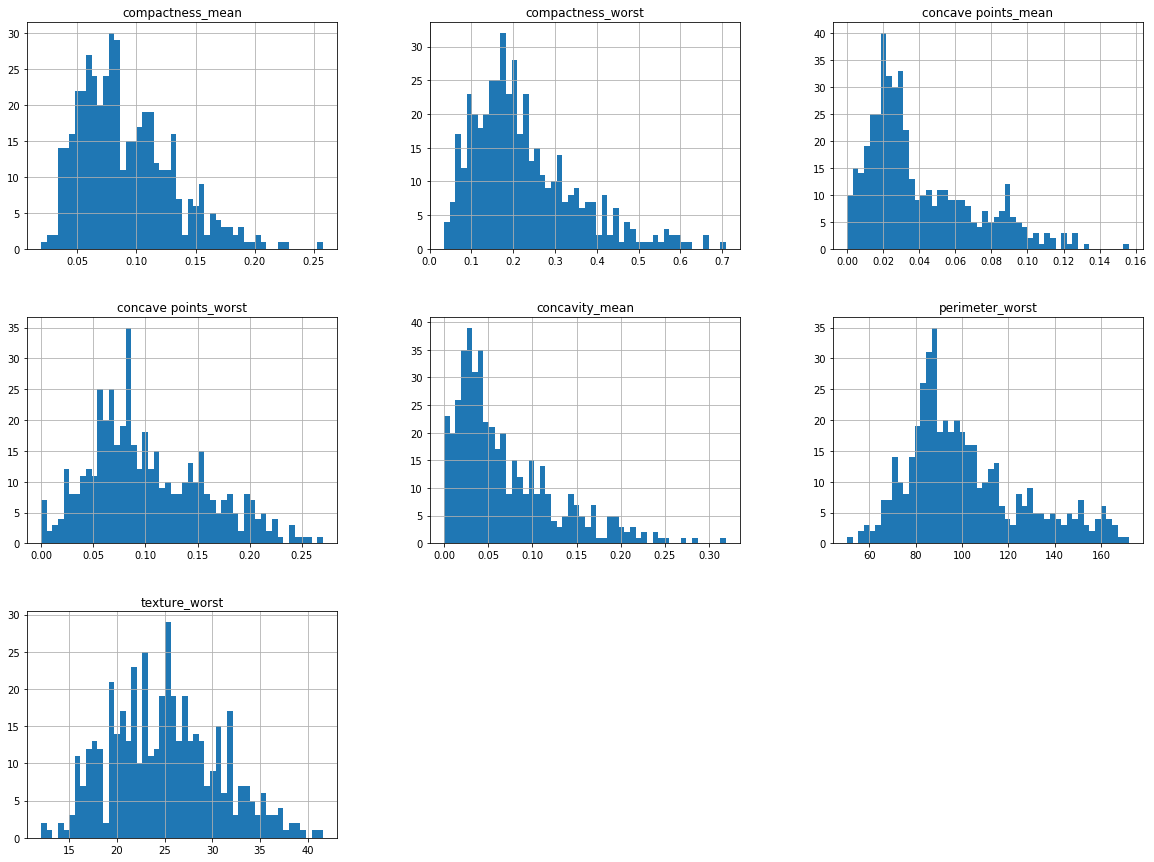

In [47]:
_ = db[corr_target_list].hist(bins=50, figsize=(20,15))

In [48]:
#переменные имеют рапсределение, отличное от нормального, но похожее на xи2
#вследствие выше озвученного факта возникает вопрос, можем ли использовать т тест? Я буду исп, только по причине того, что хи2 близко к нормальному, но не уверена, насколько это правомерно

#Для подобных случаев можно использовать хи2 тест
#хи2 тест непараметрический тест (не важно распределение), как говорят, часто используется в медицинских исследованиях. Его  стоит использовать в рамках данного исследования

#PS Прошу дать комментарии проверке, очень плаваю в данной теме.

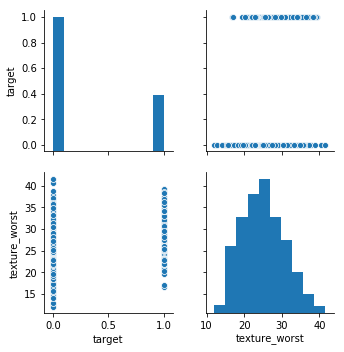

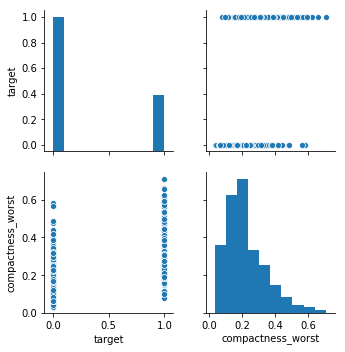

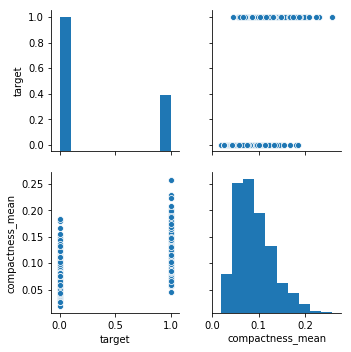

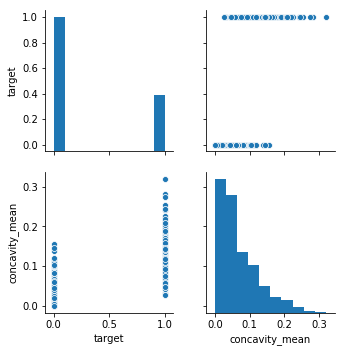

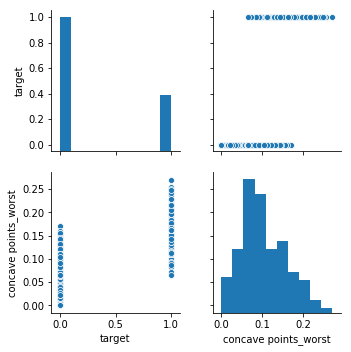

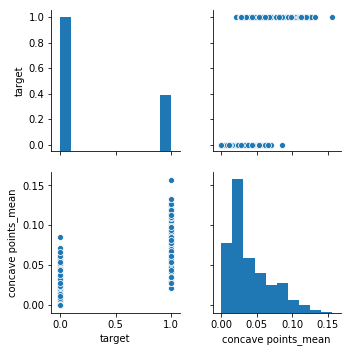

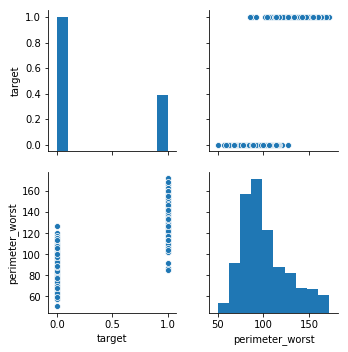

In [49]:
import seaborn as sns
for i in corr_target_list:
    sns.pairplot(db, vars=['target', i],kind='scatter')

In [50]:
from scipy import stats
test=[]
for i in corr_target_list:
    db_1=db[db['target']==1][i]
    db_0=db[db['target']==0][i]
    test.append(stats.ttest_ind(db_1, db_0))

In [51]:
test

[Ttest_indResult(statistic=10.05253700247625, pvalue=1.3644930954472208e-21),
 Ttest_indResult(statistic=14.675905389782265, pvalue=3.718352617004852e-40),
 Ttest_indResult(statistic=15.18445395636594, pvalue=2.2506485712387097e-42),
 Ttest_indResult(statistic=23.634543440566205, pvalue=5.361397946126666e-81),
 Ttest_indResult(statistic=25.52793500285457, pvalue=1.1668288285876566e-89),
 Ttest_indResult(statistic=26.95921452789483, pvalue=3.930344073857122e-96),
 Ttest_indResult(statistic=27.652420363801482, pvalue=3.0743434687864587e-99)]

In [52]:
#взаимосвязь всех переменных с таргетом значимая

In [53]:
test2=[]
for i in corr_target_list:
    av=np.median(db[i].values.tolist())
    group1=db[db[i]>av]
    group2=db[db[i]<av]
    target_ratios = sum(db['target'].values.tolist())/len(db['target'])
    observed1= sum(group1['target'].values.tolist())/len(group1['target'])
    expected1 = target_ratios * len(group1['target'])
    chi_squared_stat1 = (((observed1-expected1)**2)/expected1)
    observed2= sum(group2['target'].values.tolist())/len(group2['target'])
    expected2 = target_ratios * len(group2['target'])
    chi_squared_stat2 = (((observed2-expected2)**2)/expected2)
    chi_squared_stat=chi_squared_stat1+chi_squared_stat2
    p_value = round((1 - stats.chi2.cdf(x=chi_squared_stat,df=1)),5)
    test2.append(p_value)


In [54]:
test2

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [55]:
#взаимосвязь всех переменных с таргетом значимая

In [56]:
#строим модель

In [57]:
X=train_set[corr_target_list]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_norm=scaler.transform(X)

In [58]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_norm, Y)
y_predict=clf.predict_proba(X_norm)
y_predict1=clf.predict(X_norm)
clf.score(X_norm, Y)

0.9752066115702479

In [59]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [60]:
print(precision_score(Y, y_predict1))
print(recall_score(Y, y_predict1))
print(accuracy_score(Y, y_predict1))

0.9716981132075472
0.944954128440367
0.9752066115702479


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
results = cross_val_score(clf, X_norm, Y, cv=kf)

In [62]:
results

array([1.        , 0.97297297, 0.91891892, 1.        , 0.91666667,
       0.91666667, 0.91666667, 1.        , 1.        , 1.        ])

In [63]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_norm, Y)

In [64]:
clf2 = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_resampled, y_resampled)
y_predict21=clf2.predict_proba(X_resampled)
y_predict2=clf2.predict(X_resampled)
clf2.score(X_resampled, y_resampled)

0.952755905511811

In [65]:
print(precision_score(y_resampled, y_predict2))
print(recall_score(y_resampled, y_predict2))
print(accuracy_score(y_resampled, y_predict2))

0.96
0.9448818897637795
0.952755905511811


In [66]:
results2 = cross_val_score(clf2, X_resampled, y_resampled, cv=kf)

In [67]:
results2

array([0.98039216, 0.94117647, 0.96078431, 0.88235294, 0.92156863,
       0.98039216, 0.98039216, 0.90196078, 0.96      , 0.96      ])

In [68]:
#oversampling сокращает вероятность переобучения?

In [69]:
from sklearn.svm import LinearSVC
clf3 = LinearSVC()
clf3.fit(X_resampled, y_resampled)
y_predict3=clf3.predict(X_resampled)
clf3.score(X_resampled, y_resampled)

0.952755905511811

In [70]:
print(precision_score(y_resampled, y_predict3))
print(recall_score(y_resampled, y_predict3))
print(accuracy_score(y_resampled, y_predict3))

0.96
0.9448818897637795
0.952755905511811


In [71]:
results3 = cross_val_score(clf3, X_resampled, y_resampled, cv=kf)

In [72]:
results3

array([0.98039216, 0.94117647, 0.96078431, 0.88235294, 0.92156863,
       0.98039216, 1.        , 0.90196078, 0.96      , 0.96      ])

In [73]:
#модели показывают одинаковое качество
#возьмем логистическую регрессию

In [74]:
X_test=test_set[corr_target_list]
scaler = StandardScaler().fit(X_test)
X_norm_test=scaler.transform(X_test)

In [75]:
y_predict21_test=clf2.predict_proba(X_norm_test)
y_predict2_test=clf2.predict(X_norm_test)

In [76]:
Y_test=test_set['target']

In [77]:
print(precision_score(Y_test, y_predict2_test))
print(recall_score(Y_test, y_predict2_test))
print(accuracy_score(Y_test, y_predict2_test))

0.8571428571428571
0.96
0.945054945054945
